## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")

## Reading csv file

In [2]:
df = pd.read_csv('dataset/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning
### Dropping unnecessary columns

In [5]:
cols = ['Name', 'Ticket', 'Cabin']
df.drop(cols, axis=1, inplace=True)

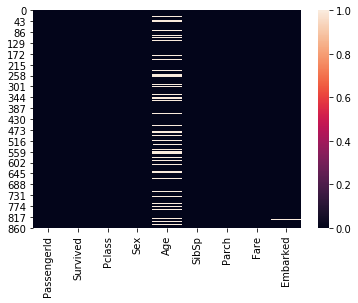

In [6]:
# Null value visualization
sns.heatmap(df.isnull())

### Filling null values using linear interpolation method

In [7]:
df['Age'] = df.Age.interpolate()

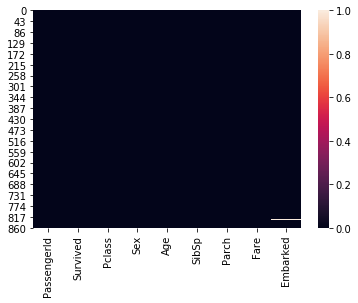

In [8]:
sns.heatmap(df.isnull())

### Dropping null values

In [9]:
df.dropna(inplace=True)

### Converting into dummy variables

In [10]:
Sex_dum = pd.get_dummies(df.Sex, drop_first=True, prefix='Sex')
Embarked_dum = pd.get_dummies(df.Embarked, drop_first=True, prefix='Embarked')

### Concatenating original and dummy dataframes

In [11]:
df = pd.concat((df, Sex_dum, Embarked_dum), axis=1)

In [12]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

### Checking duplicate values

In [13]:
df.duplicated().sum()

0

# Creating Ensemble Models
### Dividing dependent and independent features

In [14]:
X = df.drop('Survived', axis=1).values
y = df.Survived

### Splitting data for training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Function to train the model and find accuracy

In [16]:
def model_results(classifier_model):  
    model = classifier_model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    model_acc = accuracy_score(y_test, y_pred)
    model_f1 = f1_score(y_test, y_pred)
    return {'accuracy':model_acc,'f1_score':model_f1}

## Decision Tree Classifier

In [17]:
model = DecisionTreeClassifier()
dtc = model_results(model)

In [18]:
results_df = pd.DataFrame({'Method':['Decision Tree'],'Accuracy':dtc['accuracy'], 'f1_score':dtc['f1_score']})

## Voting Classifier - hard voting

In [19]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
svm = SVC()

In [20]:
model = VotingClassifier(estimators=[('lr',lr), ('dtc',dtc), ('svm',svm)], voting='hard')
evc = model_results(model)

In [21]:
temp_results_df = pd.DataFrame({'Method':['Voting Classifier'],'Accuracy':evc['accuracy'], 'f1_score':evc['f1_score']})
results_df =pd.concat([results_df, temp_results_df])

# Bagging 
## Random Forest Classifier

In [22]:
model = RandomForestClassifier(n_estimators=10)
rfc = model_results(model)

In [23]:
temp_results_df = pd.DataFrame({'Method':['Random Forest Classifier'],'Accuracy':rfc['accuracy'], 'f1_score':rfc['f1_score']})
results_df =pd.concat([results_df, temp_results_df])

## Bagging Classifier

In [24]:
model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)
bgc = model_results(model)

In [25]:
temp_results_df = pd.DataFrame({'Method':['Bagging Classifier'],'Accuracy':bgc['accuracy'], 'f1_score':bgc['f1_score']})
results_df =pd.concat([results_df, temp_results_df])

# Boosting
## Adaboosting Classifier

In [26]:
model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=5, learning_rate=1)
abc = model_results(model)

In [27]:
temp_results_df = pd.DataFrame({'Method':['Adaboosting Classifier'],'Accuracy':abc['accuracy'], 'f1_score':abc['f1_score']})
results_df =pd.concat([results_df, temp_results_df])

## Gradient Boosting Classifier

In [28]:
model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)
gbc = model_results(model)

In [29]:
temp_results_df = pd.DataFrame({'Method':['Gradient Boosting Classifier'],'Accuracy':gbc['accuracy'], 'f1_score':gbc['f1_score']})
results_df =pd.concat([results_df, temp_results_df])

In [30]:
results_df

,Method,Accuracy,f1_score
0,Decision Tree,0.741573,0.689189
0,Voting Classifier,0.803371,0.720000
0,Random Forest Classifier,0.764045,0.691176
0,Bagging Classifier,0.780899,0.697674
0,Adaboosting Classifier,0.752809,0.710526
0,Gradient Boosting Classifier,0.814607,0.736000
